# Multi Linear Regression

### Problem Statement

    - Model to predict the computer sales

### Reading and Understanding the Data

In [140]:
# Avoid Warnings

import warnings 
warnings.filterwarnings('ignore')

In [141]:
import pandas as pd
import numpy as np
comp = pd.read_csv ("~/desktop/Digi 360/Module 7/Computer_data.csv")
comp.head()

Unnamed: 0  price  speed   hd  ram  screen  cd multi premium  ads  trend
0           1   1499     25   80    4      14  no    no     yes   94      1
1           2   1795     33   85    2      14  no    no     yes   94      1
2           3   1595     25  170    4      15  no    no     yes   94      1
3           4   1849     25  170    8      14  no    no      no   94      1
4           5   3295     33  340   16      14  no    no     yes   94      1

In [142]:
comp = comp.drop(['Unnamed: 0'], axis=1)
comp.head()

price  speed   hd  ram  screen  cd multi premium  ads  trend
0   1499     25   80    4      14  no    no     yes   94      1
1   1795     33   85    2      14  no    no     yes   94      1
2   1595     25  170    4      15  no    no     yes   94      1
3   1849     25  170    8      14  no    no      no   94      1
4   3295     33  340   16      14  no    no     yes   94      1

### Data Visualization

Let's try to see if any independent varibale is corrleate with dependent variable or is there any 
collinearity between independent varibales

In [143]:
# let's import data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

Let's visualize numeric varibales using pairplot

<Figure size 720x432 with 0 Axes>

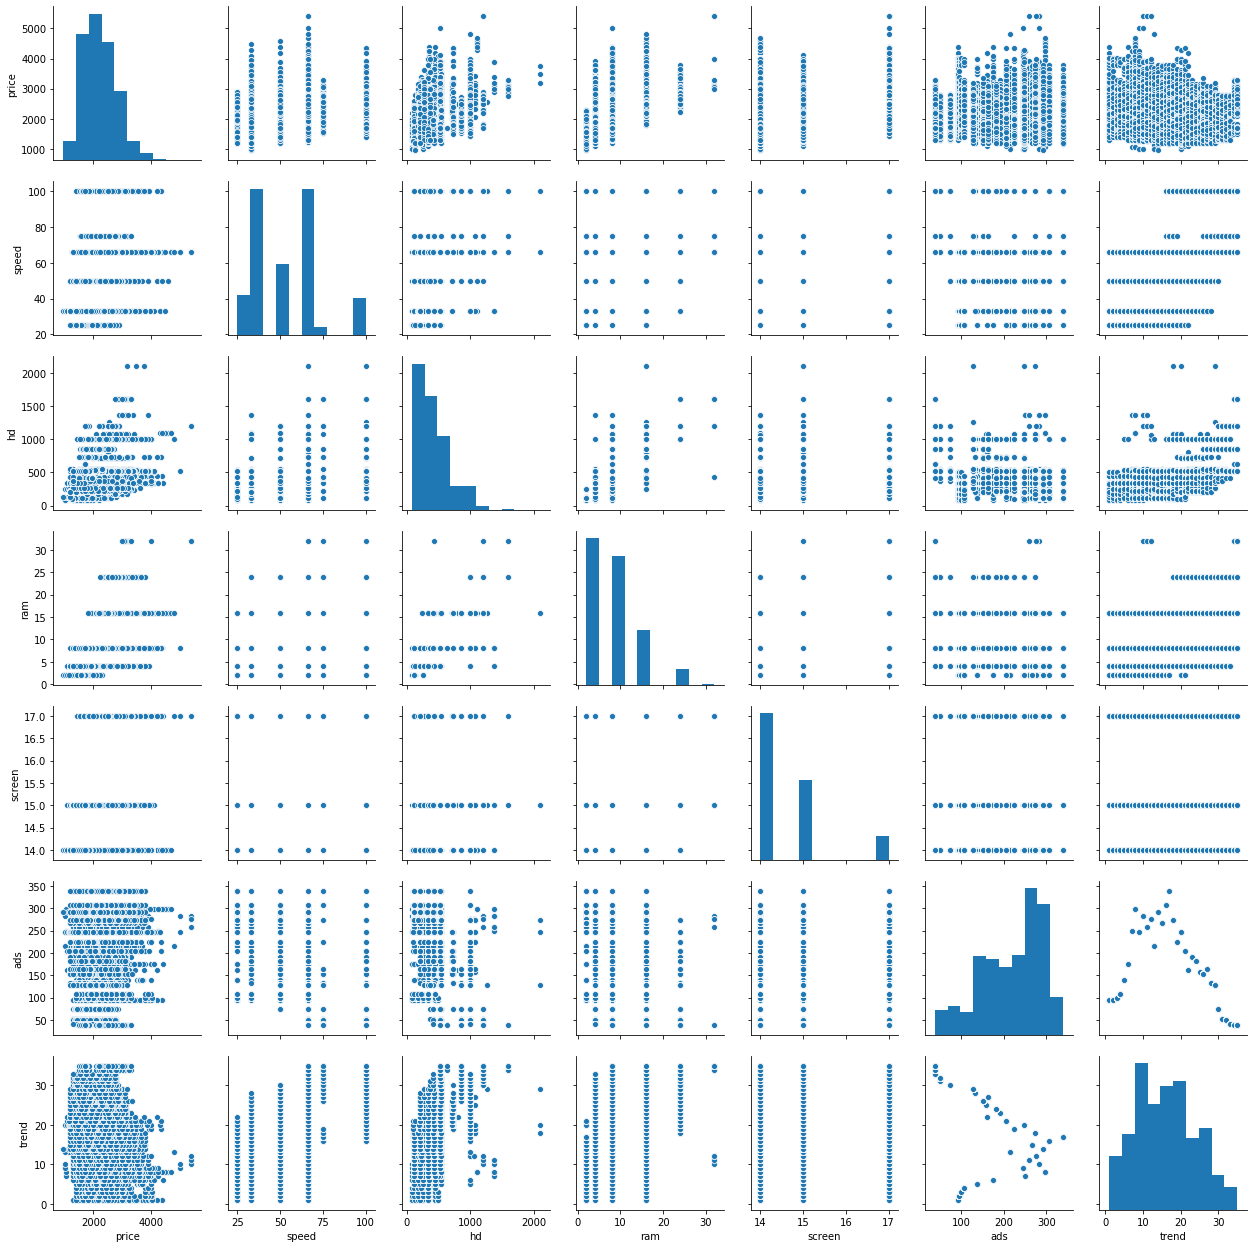

In [64]:
#Let's visulaize the numeric varibles using scatter plot
plt.figure(figsize = (10,6))
sns.pairplot(comp)
plt.show()

Let's visualize categorical varibales using boxplot

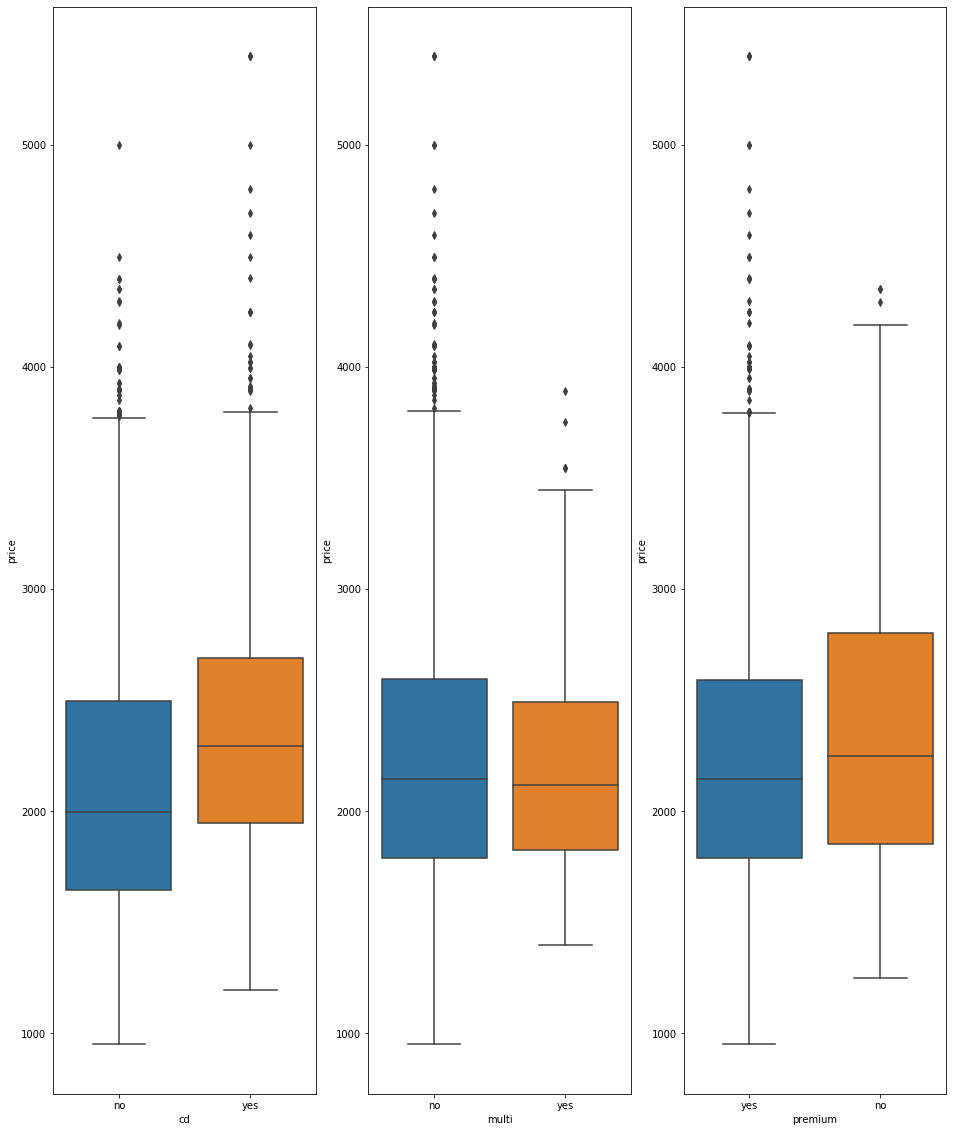

In [144]:
plt.figure(figsize = (16,20))
plt.subplot(1,3,1)
sns.boxplot(x='cd',y='price',data=comp)
plt.subplot(1,3,2)
sns.boxplot(x='multi',y='price',data=comp)
plt.subplot(1,3,3)
sns.boxplot(x='premium',y='price',data=comp)
plt.show()

### Data Preparation

In [145]:
print(comp.cd.value_counts())
print(comp.multi.value_counts())
print(comp.premium.value_counts())

no     3351
yes    2908
Name: cd, dtype: int64
no     5386
yes     873
Name: multi, dtype: int64
yes    5647
no      612
Name: premium, dtype: int64


In [146]:
#Let's assign dummy values to categorical values

comp = comp.replace(to_replace ="yes", value =1) 
comp = comp.replace(to_replace ="no", value =0) 
comp.head()

price  speed   hd  ram  screen  cd  multi  premium  ads  trend
0   1499     25   80    4      14   0      0        1   94      1
1   1795     33   85    2      14   0      0        1   94      1
2   1595     25  170    4      15   0      0        1   94      1
3   1849     25  170    8      14   0      0        0   94      1
4   3295     33  340   16      14   0      0        1   94      1

In [147]:
print(comp.cd.value_counts())
print(comp.multi.value_counts())
print(comp.premium.value_counts())

0    3351
1    2908
Name: cd, dtype: int64
0    5386
1     873
Name: multi, dtype: int64
1    5647
0     612
Name: premium, dtype: int64


### Rescaling the features

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Let's apply MinMaxScaler to the columns except the dummy varibales
num_vars = ['price', 'speed', 'hd', 'ram','screen','ads','trend']

comp1[num_vars] = scaler.fit_transform(comp[num_vars])
comp1.describe()

price        speed           hd          ram       screen  \
count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000   
mean      0.285523     0.360147     0.166635     0.209565     0.202908   
std       0.130518     0.282103     0.127994     0.187703     0.301705   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.189888     0.106667     0.066337     0.066667     0.000000   
50%       0.268539     0.333333     0.128713     0.200000     0.000000   
75%       0.369888     0.546667     0.221782     0.200000     0.333333   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                cd        multi      premium          ads        trend  
count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000  
mean      0.464611     0.139479     0.902221     0.607670     0.439029  
std       0.498786     0.346474     0.297040     0.249451     0.231588  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     1.000000     0.411667     0.264706  
50%       0.000000     0.000000     1.000000     0.690000     0.441176  
75%       1.000000     0.000000     1.000000     0.786667     0.602941  
max       1.000000     1.000000     1.000000     1.000000     1.000000

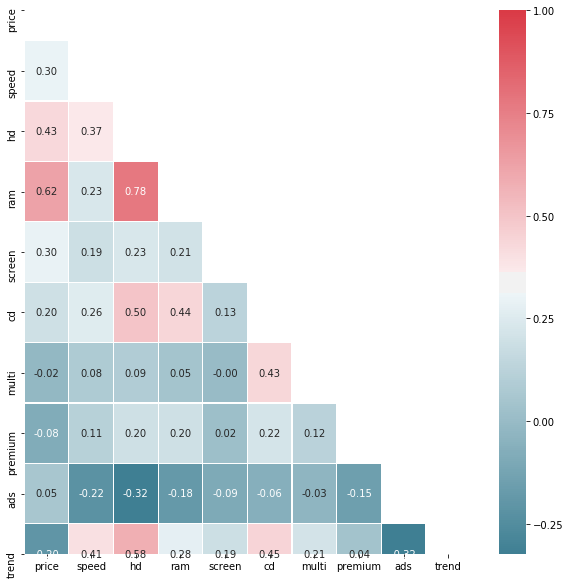

In [150]:
#Let's see the correlation among the varibales now

corr = comp1.corr()
fig, ax = plt.subplots(figsize=(10,10))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()

### Building the model

In [151]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [152]:
# Running the linear model
lm = smf.ols('price~speed+hd+ram+screen+cd+multi+premium+ads+trend',data=comp1).fit() 

In [153]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:21:01   Log-Likelihood:                 8540.3
No. Observations:                6259   AIC:                        -1.706e+04
Df Residuals:                    6249   BIC:                        -1.699e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3254      0.004     77.202      0.0

### Checking VIF's

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
comp_vif = comp[['speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium','ads', 'trend']]
comp_vif.head()

speed        hd       ram    screen  cd  multi  premium       ads  trend
0  0.000000  0.000000  0.066667  0.000000   0      0        1  0.183333    0.0
1  0.106667  0.002475  0.000000  0.000000   0      0        1  0.183333    0.0
2  0.000000  0.044554  0.066667  0.333333   0      0        1  0.183333    0.0
3  0.000000  0.044554  0.200000  0.000000   0      0        0  0.183333    0.0
4  0.106667  0.128713  0.466667  0.000000   0      0        1  0.183333    0.0

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = comp_vif.columns
vif['VIF'] = [variance_inflation_factor(comp_vif.values, i) for i in range(comp_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1       hd  11.34
8    trend   7.54
2      ram   6.63
6  premium   6.60
7      ads   4.17
4       cd   3.31
0    speed   3.29
3   screen   1.57
5    multi   1.50

Since `hd` feature has high VIF, let's drop it

In [129]:
X1 = comp_vif.drop('hd',1)
X1.columns

Index(['speed', 'ram', 'screen', 'cd', 'multi', 'premium', 'ads', 'trend'], dtype='object')

In [130]:
# Running the linear model again
lm_2 = smf.ols('price~speed+ram+screen+cd+multi+premium+ads+trend',data=comp).fit() 

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     2304.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:17:55   Log-Likelihood:                 8162.6
No. Observations:                6259   AIC:                        -1.631e+04
Df Residuals:                    6250   BIC:                        -1.625e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3242      0.004     72.413      0.0

In [131]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5  premium  6.57
7    trend  5.49
6      ads  3.93
0    speed  3.26
3       cd  3.26
1      ram  3.05
2   screen  1.56
4    multi  1.49

Let's drop `premium` since it has high VIF

In [132]:
X2 = X1.drop('premium',1)
X2.columns

Index(['speed', 'ram', 'screen', 'cd', 'multi', 'ads', 'trend'], dtype='object')

In [133]:
# Running the linear model again
lm_3 = smf.ols('price~speed+ram+screen+cd+multi+ads+trend',data=comp).fit() 

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1991.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:18:04   Log-Likelihood:                 7533.5
No. Observations:                6259   AIC:                        -1.505e+04
Df Residuals:                    6251   BIC:                        -1.500e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2161      0.004     57.267      0.0

In [134]:
#Calculating VIF 
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6    trend  5.08
3       cd  3.26
0    speed  3.16
1      ram  2.87
5      ads  2.51
2   screen  1.56
4    multi  1.48

Since VIF for all varibales is below or around 5, we can say that the input variables are not collinear. So, we don't need to drop any varibale. All are significant here. 

### Transformations

    - Let's try 7th Degree polynomial

In [165]:
lm_4 = smf.ols('price~speed+I(speed^2)+I(speed^3)+I(speed^4)+I(speed^5)+I(speed^6)+I(speed^7)+'
                 '+ram+I(ram^2)+I(ram^3)+I(ram^4)+'
                 'I(ram^5)+I(ram^6)+I(ram^7)+screen+I(screen^2)+I(screen^3)+I(screen^4)+I(screen^5)+'
                 'I(screen^6)+I(screen^7)+cd+I(cd^2)+I(cd^3)+I(cd^4)+I(cd^5)+I(cd^6)+I(cd^7)+multi+'
                 'I(multi^2)+I(multi^3)+I(multi^4)+I(multi^5)+I(multi^6)+I(multi^7)+ads+I(ads^2)+I(ads^3)+'
                 'I(ads^4)+I(ads^5)+I(ads^6)+I(ads^7)+trend+I(trend^2)+I(trend^3)+I(trend^4)+I(trend^5)+'
                 'I(trend^6)+I(trend^7)',data=comp).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     812.1
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:28:28   Log-Likelihood:                -44819.
No. Observations:                6259   AIC:                         8.968e+04
Df Residuals:                    6239   BIC:                         8.981e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3112      0.122     10.777


If we further go for transformations like nth degree polynomial, we will get good model with good R^2 value. But we need to take care of over fitting. So, let's stop building the model here. 

### Splitting the data to train and test

In [169]:
from sklearn.model_selection import train_test_split
cm_train,cm_test = train_test_split(comp,test_size=0.3) ##30% of test data
cm_train.head()

price  speed   hd  ram  screen  cd  multi  premium  ads  trend
3243   1395     25  214    4      14   0      0        1  307     16
5961   1295     50  340    4      14   0      0        1  129     29
2417   1475     33  120    4      14   0      0        0  216     13
5552   1828     66  270    4      14   0      0        0  163     27
4434   2404    100  528    8      14   1      0        1  248     20

In [170]:
###Train data prediction
train_pred = lm_4.predict(cm_train)

In [171]:
###Finding train Risedual values
train_resid = train_pred - cm_train.price

In [172]:
###rmse value for train data
train_rmse = np.sqrt (np.mean(train_resid * train_resid))
train_rmse

310.90534692975945

In [174]:
###Prediction on test data
test_pred = lm_4.predict(cm_test)

In [175]:
###Finding train Risedual values
test_resid = test_pred - cm_test.price

In [176]:
###rmse value for train data
test_rmse = np.sqrt (np.mean(test_resid * test_resid))
test_rmse

313.32263243302424

### Conclusion:- 

        - Built the model with R^2 is 0.71
        - RMSE for both test and train is very near
        - We can conlcude that our model is moderately significant.
        
We can conclude that computer sales depends on features `trend`, `cd`, `speed`,`ram`, `ads`, `screen` and `multi`.
